In [1]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('model_data.csv')

In [3]:
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,2P%,FT%,TmNetRtg,Continuity,Next Rtg,Next Cont,Next WS,Veteran Value,VV Class,Player Level
0,1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,...,0.501,0.868,-8.8,0.75,4.4,0.59,3.7,2696.774194,0,0
1,3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,...,0.487,0.690,-8.8,0.75,4.4,0.59,6.7,13523.529412,0,0
2,7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,...,0.569,0.694,4.7,0.46,-0.9,0.95,8.6,16.396739,0,2
3,8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,...,0.493,0.750,4.7,0.46,-0.9,0.95,6.8,8.694834,0,2
4,9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,...,0.572,0.896,4.7,0.46,-0.9,0.95,3.8,2.435227,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1393,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,...,0.732,0.514,5.6,0.52,5.5,0.58,4.0,-247.507123,1,0
798,1394,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,...,0.564,0.693,5.6,0.52,2.9,0.60,5.6,0.939103,0,3
799,1396,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,...,0.477,0.791,1.9,0.47,0.1,0.88,3.1,3.441922,0,1
800,1400,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,...,0.500,0.816,2.2,0.80,4.8,0.70,3.2,-779.220779,1,0


In [4]:
df[df['Player']=='Ray Allen']

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,2P%,FT%,TmNetRtg,Continuity,Next Rtg,Next Cont,Next WS,Veteran Value,VV Class,Player Level
380,691,2008,Ray Allen,SG,32.0,BOS,73.0,2624.0,16.4,0.584,...,0.485,0.907,10.8,0.50,7.9,0.94,11.1,541.504391,0,2
412,743,2009,Ray Allen,SG,33.0,BOS,79.0,2876.0,17.3,0.624,...,0.542,0.952,7.9,0.94,3.7,0.79,7.9,2.103391,0,2
444,794,2010,Ray Allen,SG,34.0,BOS,80.0,2819.0,15.2,0.601,...,0.556,0.913,3.7,0.79,5.7,0.76,10.0,1281.369496,0,1
478,851,2011,Ray Allen,SG,35.0,BOS,80.0,2890.0,16.4,0.615,...,0.520,0.881,5.7,0.76,2.6,0.65,4.7,1.150717,0,1
512,907,2012,Ray Allen,SG,36.0,BOS,46.0,1565.0,14.8,0.607,...,0.463,0.915,2.6,0.65,8.2,0.82,5.4,4436.359058,0,1
546,955,2013,Ray Allen,SG,37.0,MIA,79.0,2035.0,14.7,0.599,...,0.480,0.886,8.2,0.82,5.1,0.91,4.1,1.286803,0,1


## Pre-Processing

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%',
       'FT%', 'TmNetRtg', 'Continuity', 'Next Rtg', 'Next Cont', 'Next WS',
       'Veteran Value', 'VV Class', 'Player Level'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

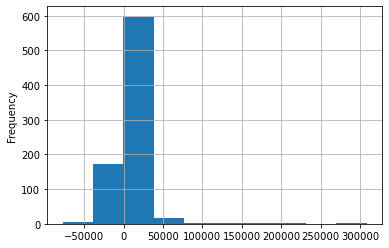

In [6]:
df['Veteran Value'].plot.hist(grid=True)

In [17]:
# calculate summary statistics
data = df['Veteran Value']
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
lower, upper = -50000,50000

In [18]:
outliers = [x[0] for x in enumerate(df['Veteran Value']) if x[1] < lower or x[1] > upper]
outliers

[21,
 101,
 128,
 129,
 137,
 140,
 190,
 248,
 271,
 440,
 533,
 536,
 564,
 649,
 679,
 681,
 682,
 714,
 718,
 771,
 784,
 788]

In [19]:
df.drop(index=outliers,inplace=True)

<AxesSubplot:ylabel='Frequency'>

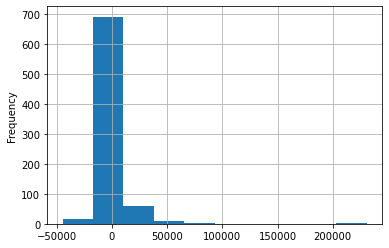

In [20]:
df['Veteran Value'].plot.hist(grid=True)

[ 15. 690.  60.  10.   3.   0.   0.   0.   0.   1.] [-44780.3030303  -17211.36363636  10357.57575758  37926.51515152
  65495.45454545  93064.39393939 120633.33333333 148202.27272727
 175771.21212121 203340.15151515 230909.09090909]


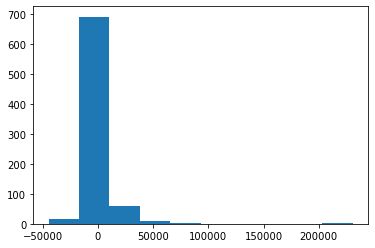

In [21]:
n, bins, patches = plt.hist(df['Veteran Value'])
print(n,bins)

In [22]:
def findPercentile(veteran_values, num_classes):
    percentiles = []
    inc = 100 / num_classes
#     percentiles = [0]
    start = inc
    for _ in range(num_classes-1):
        percentiles.append(np.percentile(veteran_values, start))

        start += inc
#     percentiles.append(100)
    return percentiles

In [23]:
percentiles = findPercentile(df['Veteran Value'],5)
percentiles

[-391.2369119084183, 1.8214174130286667, 9.179657551750568, 1978.5342994429993]

In [24]:
target = df['Veteran Value']

def getClass(vv):
    if vv < percentiles[0]:
        return 0
    elif percentiles[0] <= vv < percentiles[1]:
        return 1
    elif percentiles[1] <= vv < percentiles[2]:
        return 2
    elif percentiles[2] <= vv < percentiles[3]:
        return 3
    elif percentiles[3] < vv:
        return 4

    
df['VV Class'] = [getClass(vv) for vv in df['Veteran Value']]
target_class = df['VV Class']

In [25]:
df['Veteran Value'].describe()

count       779.000000
mean       1994.206195
std       13114.993643
min      -44780.303030
25%           0.000000
50%           3.265323
75%         981.393579
max      230909.090909
Name: Veteran Value, dtype: float64

In [26]:
df.drop(['Unnamed: 0','Age','Year','Player','Pos','Tm','Next WS','WS','Next Rtg','TmNetRtg','Continuity','Next Cont', 'Veteran Value', 'VV Class'], axis=1, inplace=True)

In [27]:
df.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', '3P%',
       '2P%', 'FT%', 'Player Level'],
      dtype='object')

In [28]:
#try scaling values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [29]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0)
n_neighbors = 15
neigh = KNeighborsClassifier(n_neighbors)
rf = RandomForestClassifier(n_estimators=270, max_depth=50, min_samples_leaf=10, min_samples_split = 10,verbose=False)
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                             n_estimators=250, learning_rate=0.5)
mlpc = MLPClassifier(hidden_layer_sizes=(1000,200,30,5),activation='relu',learning_rate_init=0.001,batch_size=256,max_iter=400,verbose=False)

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))
estimator.append(('LRC',clf))
estimator.append(('KNC',neigh))
vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=False) 

temp = []
models = [clf,neigh,rf,abc,mlpc,vot_soft]
for m in models:
    cv_results = cross_validate(m, scaled_data, target_class, cv=kf, scoring='roc_auc_ovr', return_train_score=False)
    temp.append(cv_results)


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
scores = []
for i in temp:
    scores.append(np.average(i['test_score']))
scores


[0.6561021266940601,
 0.599558614573991,
 0.6338790546957868,
 0.6000862150753268,
 0.5569837685003243,
 0.6149089984706249]

In [31]:
rf.fit(scaled_data,target_class)

RandomForestClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=270, verbose=False)

In [32]:
rf.predict_proba(scaled_data)

array([[0.25791657, 0.16092844, 0.15356879, 0.14589744, 0.28168875],
       [0.34487888, 0.11205368, 0.13298125, 0.10979353, 0.30029265],
       [0.13825709, 0.1479319 , 0.15914215, 0.40631541, 0.14835345],
       ...,
       [0.14722765, 0.26864854, 0.31953745, 0.19276446, 0.0718219 ],
       [0.23460376, 0.10344511, 0.09165184, 0.19291833, 0.37738096],
       [0.09993777, 0.08482607, 0.09631243, 0.14259239, 0.57633134]])

In [34]:
from sklearn import metrics
metrics.roc_auc_score(target_class,rf.predict_proba(scaled_data),multi_class='ovr')

0.93321319703614

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, target_class.values, random_state=42,test_size=0.1)

### Logistic Regression Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0).fit(xtrain, ytrain)
clf.predict(xtest)
clf.predict_proba(xtest)
scores = cross_val_score(clf, xtest, ytest, cv=5)
print(scores.mean())

0.3458333333333333


In [37]:
metrics.roc_auc_score(ytest,clf.predict_proba(xtest),multi_class='ovr')

0.6789541469482857

### KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

n_neighbors=15
neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [39]:
metrics.roc_auc_score(ytest,neigh.predict_proba(xtest),multi_class='ovr')

0.6018597422514167

### Random Forests Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=270, max_depth=50, min_samples_leaf=10, min_samples_split = 10,verbose=False)
rf.fit(xtrain, ytrain)
rf.predict_proba(xtest)

array([[0.17011046, 0.27831059, 0.22851395, 0.2246158 , 0.0984492 ],
       [0.21237512, 0.19515328, 0.17530928, 0.28041784, 0.13674448],
       [0.33380206, 0.20344359, 0.19614976, 0.20086847, 0.06573612],
       [0.19111344, 0.13259863, 0.24701374, 0.20206886, 0.22720534],
       [0.26846341, 0.22509547, 0.26166911, 0.17871366, 0.06605835],
       [0.12744595, 0.05948877, 0.09988236, 0.16209371, 0.55108921],
       [0.3413032 , 0.20407262, 0.19637277, 0.18271793, 0.07553347],
       [0.10185528, 0.09126112, 0.1331738 , 0.18899295, 0.48471685],
       [0.1973097 , 0.14017386, 0.36201713, 0.21216115, 0.08833816],
       [0.311394  , 0.30148083, 0.1660735 , 0.14556948, 0.07548219],
       [0.12725817, 0.10824521, 0.08985892, 0.19210976, 0.48252794],
       [0.14938094, 0.34159875, 0.21121613, 0.24883413, 0.04897005],
       [0.28680385, 0.15833049, 0.24662317, 0.22388668, 0.08435581],
       [0.19212424, 0.13880179, 0.12865252, 0.18769864, 0.35272281],
       [0.18330421, 0.19910547, 0.

In [41]:
metrics.roc_auc_score(ytest,rf.predict_proba(xtest),multi_class='ovr')

0.6988101095234022

### Boosted Classifier


In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                         n_estimators=250, learning_rate=0.5)
abc.fit(xtrain, ytrain)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=64),
                   learning_rate=0.5, n_estimators=250)

In [43]:
metrics.roc_auc_score(ytest,abc.predict_proba(xtest),multi_class='ovr')

0.6310100308692762

### Neural Network

In [44]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(1000,200,30,5),activation='relu',learning_rate_init=0.001,batch_size=256, verbose=False,max_iter=400)
mlpc.fit(xtrain, ytrain)

MLPClassifier(batch_size=256, hidden_layer_sizes=(1000, 200, 30, 5),
              max_iter=400)

In [45]:
metrics.roc_auc_score(ytest,mlpc.predict_proba(xtest),multi_class='ovr')

0.6184830696171288

### Voting Classifier

In [46]:
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('LRC',clf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))
estimator.append(('KNC',neigh))

vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=False) 
vot_soft.fit(xtrain, ytrain)


VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(max_depth=50,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10,
                                                     n_estimators=270,
                                                     verbose=False)),
                             ('LRC',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('ABC',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                       min_samples_split=64),
                                                 learning_rate=0.5,
                                                 n_estimators=250)),
                             ('MLP',
                

In [47]:
metrics.roc_auc_score(ytest,vot_soft.predict_proba(xtest),multi_class='ovr')

0.6332252716693763

## Test on Veterans of 2021-2022 Season

Data Cleaning for NBA 2021-2022

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv('compiled.csv')

In [49]:
data2 = data[data['Year']==2021]
data2 = data2.copy()

In [50]:
data2

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg
1461,2021,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,14.6,0.547,0.418,...,1.7,0.8,2.6,0.073,0.1,-1.6,0.409,0.429,0.890,1.8
1462,2021,Robert Covington,PF,30.0,POR,70.0,2243.0,11.2,0.553,0.699,...,1.4,2.4,3.7,0.080,-1.5,1.2,0.379,0.451,0.806,1.8
1463,2021,Damian Lillard,PG,30.0,POR,67.0,2398.0,25.6,0.623,0.528,...,9.6,0.8,10.4,0.209,7.4,-1.6,0.391,0.519,0.928,1.8
1464,2021,Will Barton,SF,30.0,DEN,56.0,1736.0,11.8,0.538,0.423,...,0.7,1.5,2.2,0.061,-0.8,-1.2,0.381,0.459,0.785,4.8
1465,2021,JaMychal Green,PF,30.0,DEN,58.0,1120.0,13.6,0.590,0.529,...,1.4,1.2,2.6,0.110,-0.4,-1.6,0.399,0.534,0.807,4.8
1466,2021,Paul Millsap,PF,35.0,DEN,56.0,1162.0,16.4,0.565,0.357,...,1.7,1.6,3.2,0.133,0.4,0.1,0.343,0.550,0.724,4.8
1467,2021,Nicolas Batum,SF,32.0,LAC,67.0,1835.0,12.9,0.617,0.660,...,2.7,2.3,5.0,0.132,0.5,1.0,0.404,0.579,0.828,6.1
1468,2021,Paul George,SF,30.0,LAC,54.0,1821.0,20.5,0.598,0.437,...,3.0,2.3,5.3,0.139,4.0,-0.4,0.411,0.510,0.868,6.1
1469,2021,Reggie Jackson,SG,30.0,LAC,67.0,1544.0,14.2,0.576,0.482,...,2.3,1.4,3.7,0.115,0.5,-0.5,0.433,0.465,0.817,6.1
1470,2021,Marcus Morris,PF,31.0,LAC,57.0,1502.0,14.5,0.614,0.507,...,2.1,1.5,3.6,0.115,0.9,-1.0,0.473,0.472,0.820,6.1


In [51]:
starter = data2.loc[(data2['WS/48']>=0.1) & (data2['MP']/data2['G']>25),'Player']
all_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 20),'Player']
super_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 30),'Player']
player_level = []
for p in data2['Player']:
    if p in list(super_star):
        player_level.append(3)
    elif p in list(all_star) and p not in list(super_star):
        player_level.append(2)
    elif p in list(starter) and p not in list(super_star) and p not in list(all_star):
        player_level.append(1)
    else:
        player_level.append(0)
data2['Player Level'] = player_level


In [52]:
data2_copy = data2.copy()
data2.drop(['Age','Year','Player','Pos','Tm','WS','TmNetRtg'], axis=1, inplace=True)
len(data2.columns)

22

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)

In [54]:
vv21 = rf.predict(scaled_data)

In [55]:
from collections import defaultdict
preds = defaultdict(list)
for t in zip(data2_copy['Player'], vv21,data2_copy['Player Level']):
    preds[t[2]].append(tuple((t[0], t[1])))
preds = sorted(preds.items(),key=lambda x: (x[1][1],x[0]),reverse=True)
for i in preds:
    print(i,'\n')

'''
for k,v in preds.items():
    print(k,":",v)
    print('\n')
'''

(3, [('Damian Lillard', 1), ('Stephen Curry', 1), ('Kevin Durant', 3), ('LeBron James', 2)]) 

(0, [('Carmelo Anthony', 4), ('Robert Covington', 1), ('Will Barton', 4), ('JaMychal Green', 4), ('Paul Millsap', 4), ('Reggie Jackson', 1), ('Kent Bazemore', 4), ('Eric Bledsoe', 4), ('Goran Dragiƒá', 4), ('Andre Iguodala', 4), ('Dwight Howard', 1), ('Rudy Gay', 4), ('Patty Mills', 4), ('DeAndre Jordan', 3), ('Wayne Ellington', 4), ('Danilo Gallinari', 4), ('Justin Holiday', 1), ('Wesley Matthews', 4), ('Markieff Morris', 4), ('Robin Lopez', 0), ('Russell Westbrook', 4), ('Ricky Rubio', 1), ('Garrett Temple', 4), ('Thaddeus Young', 1), ('John Wall', 4)]) 

(1, [('Nicolas Batum', 1), ('Paul George', 1), ('Marcus Morris', 1), ('Draymond Green', 2), ('Bojan Bogdanoviƒá', 1), ('Mike Conley', 4), ('Joe Ingles', 1), ('Seth Curry', 1), ('Danny Green', 1), ('Jeff Green', 0), ('Mason Plumlee', 3), ('Brook Lopez', 1), ('Kyle Lowry', 4), ('Nikola Vuƒçeviƒá', 4), ('Kemba Walker', 4)]) 

(2, [('Jimmy But

'\nfor k,v in preds.items():\n    print(k,":",v)\n    print(\'\n\')\n'

In [56]:
with open('results.txt', 'a') as file:
    for i in preds:
        file.write(str(i))
        file.write('\n')
    file.write('\n')
    file.close()